Ref: notebook från Adit Deshpande (https://github.com/adeshpande3)

# Introduction

In [4]:
import pandas as pd
import numpy as np

# Loading in Data

The first step in any ML problem is identifying what format your data is in, and then loading it into whatever framework you're using. 

We're going to be looking at a sports dataset that shows the results from NCAA basketball games from 1985 to 2016. This dataset is in a CSV file, and the function we're going to use to read in the file is called **pd.read_csv()**. This function returns a **dataframe** variable. The dataframe is the golden jewel data structure for Pandas. It is defined as "a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)".

Just think of it as a table for now. 

Pandas import can handle most things:
Comma-separated values (CSV),
XLSX,
XML,
DOCX,
ZIP-files,
Text format (.txt),
JSON,
PDF,
HTML,
Images,
MP3,
MP4,
SQL

In [5]:
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

# The Basics

Now that we have our dataframe in our variable df, let's look at what it contains. We can use the function **head()** to see the first couple rows of the dataframe (or the function **tail()** to see the last few rows).

In [6]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [7]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


We can see the dimensions of the dataframe using the the **shape** attribute

In [8]:
df.shape

(145289, 8)

In order to get a better idea of the type of data that we are dealing with, we can call the **describe()** function to see statistics like mean, min, etc about each column of the dataset. 

In [9]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


The following is a summary of the 3 data structures used in Pandas

![](DataStructures.png)

# Extracting Rows and Columns

The bracket indexing operator is one way to extract certain columns from a dataframe.

We can also extract all the column names as a list, by using the **columns** attribute and can extract the rows with the **index** attribute

In [10]:
df.columns

Index(['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc',
       'Numot'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=145289, step=1)

In [12]:
df['Season'].head()

0    1985
1    1985
2    1985
3    1985
4    1985
Name: Season, dtype: int64

In [ ]:
df.Season.head()

In [13]:
df[['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


Notice that you can acheive the same result by using the loc function. Loc is a veryyyy versatile function that can help you in a lot of accessing and extracting tasks. 

In [15]:
df.loc[:2, ['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56


Note the difference is the return types when you use brackets and when you use double brackets. 

In [16]:
type(df['Wscore'])

pandas.core.series.Series

In [17]:
type(df[['Wscore', 'Lscore']])

pandas.core.frame.DataFrame

You've seen before that you can access columns through df['col name']. You can access rows by using slicing operations. 

In [19]:
df[6:7]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
6,1985,25,1228,64,1226,44,N,0


Here's an equivalent using iloc

In [20]:
df.iloc[0:3]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0


In [22]:
#df[0]

In [23]:
df.loc[0]

Season    1985
Daynum      20
Wteam     1228
Wscore      81
Lteam     1328
Lscore      64
Wloc         N
Numot        0
Name: 0, dtype: object

In [24]:
df.iloc[:3]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0


In [ ]:
df.loc[:3]

Notice the slight difference in that iloc is exclusive of the second number, while loc is inclusive. 

If you'd like to see more discussion on how loc and iloc are different, check out this great Stack Overflow post: http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation. Just remember that **iloc looks at position** and **loc looks at labels**. Loc becomes very important when your row labels aren't integers. 

In [25]:
s = pd.Series(np.nan, index=[49,48,47,46,45, 1, 2, 3, 4, 5]);s

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
dtype: float64

In [26]:
s.iloc[:3] # slice the first three rows

49   NaN
48   NaN
47   NaN
dtype: float64

In [27]:
s.loc[:3] # slice up to and including label 3

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

In [28]:
s.iloc[:6]

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
dtype: float64

In [30]:
#s.loc[:6]

# Acessing Values

Then, in order to get attributes about the game, we need to use the **iloc[]** function. Iloc is definitely one of the more important functions. The main idea is that you want to use it whenever you have the integer index of a certain row that you want to access. As per Pandas documentation, iloc is an "integer-location based indexing for selection by position."

In [31]:
df['Wscore'].idxmax()

24970

In [32]:
df.iloc[[df['Wscore'].idxmax()]]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
24970,1991,68,1258,186,1109,140,H,0


Let's take this a step further. Let's say you want to know the game with the highest scoring winning team (this is what we just calculated), but you then want to know how many points the losing team scored. 

In [33]:
df.iloc[[df['Wscore'].idxmax()]]['Lscore']

24970    140
Name: Lscore, dtype: int64

When you see data displayed in the above format, you're dealing with a Pandas **Series** object, not a dataframe object.

In [34]:
type(df.iloc[[df['Wscore'].idxmax()]]['Lscore'])

pandas.core.series.Series

In [35]:
type(df.iloc[[df['Wscore'].idxmax()]])

pandas.core.frame.DataFrame


The other really important function in Pandas is the **loc** function. Contrary to iloc, which is an integer based indexing, loc is a "Purely label-location based indexer for selection by label". Since all the games are ordered from 0 to 145288, iloc and loc are going to be pretty interchangable in this type of dataset.

https://stackoverflow.com/questions/31593201/how-are-iloc-ix-and-loc-different
https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte

loc gets rows (or columns) with particular labels from the index.
iloc gets rows (or columns) at particular positions in the index (so it only takes integers).


# Useful functions

Okay, so now let's looking at information that we want to extract from the dataframe. Let's say I wanted to know the max value of a certain column. The function **max()** will show you the maximum values of all columns

In [36]:
df.max()

Season    2016
Daynum     132
Wteam     1464
Wscore     186
Lteam     1464
Lscore     150
Wloc         N
Numot        6
dtype: object

In [37]:
df.dtypes

Season     int64
Daynum     int64
Wteam      int64
Wscore     int64
Lteam      int64
Lscore     int64
Wloc      object
Numot      int64
dtype: object

Then, if you'd like to specifically get the max value for a particular column, you pass in the name of the column using the bracket indexing operator

In [38]:
df['Wscore'].max()

186

If you'd like to find the mean of the Losing teams' score. 

In [ ]:
df['Lscore'].mean()

One of the most useful functions that you can call on certain columns in a dataframe is the **value_counts()** function. It shows how many times each item appears in the column. This particular command shows the number of games in each season

In [39]:
df['Season'].value_counts()

2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: Season, dtype: int64

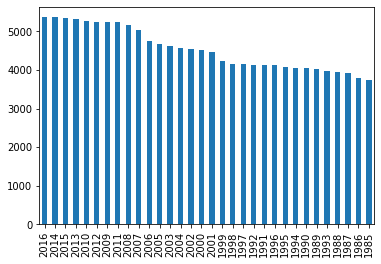

In [41]:
df_season = df['Season'].value_counts()
df_season.plot(kind='bar')

# Sorting

Let's say that we want to sort the dataframe in increasing order for the scores of the losing team

In [42]:
df.sort_values('Lscore').head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
85042,2005,66,1131,73,1216,22,H,0
103660,2009,26,1326,59,1359,22,H,0


In [ ]:
#df.groupby('Lscore')

# Filtering Rows Conditionally

Now, let's say we want to find all of the rows that satisy a particular condition. For example, I want to find all of the games where the winning team scored more than 150 points. The idea behind this command is you want to access the column 'Wscore' of the dataframe df (df['Wscore']), find which entries are above 150 (df['Wscore'] > 150), and then returns only those specific rows in a dataframe format (df[df['Wscore'] > 150]).

In [43]:
df[df['Wscore'] > 150]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0
17867,1989,92,1258,181,1109,150,H,0
19653,1990,30,1328,173,1109,101,H,0
19971,1990,38,1258,152,1109,137,A,0
20022,1990,40,1116,166,1109,101,H,0
22145,1990,97,1258,157,1362,115,H,0


This also works if you have multiple conditions. Let's say we want to find out when the winning team scores more than 150 points and when the losing team scores below 100. 

In [46]:
df[(df['Wscore'] >= 150) & (df['Lscore'] < 100)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
20058,1990,40,1242,150,1246,95,H,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
38986,1994,110,1380,150,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


# Grouping

Another important function in Pandas is **groupby()**. This is a function that allows you to group entries by certain attributes (e.g Grouping entries by Wteam number) and then perform operations on them. The following function groups all the entries (games) with the same Wteam number and finds the mean for each group. 

In [47]:
df.groupby('Wteam')['Wscore'].mean().head()

Wteam
1101    78.111111
1102    69.893204
1103    75.839768
1104    75.825944
1105    74.960894
Name: Wscore, dtype: float64

This next command groups all the games with the same Wteam number and finds where how many times that specific team won at home, on the road, or at a neutral site

In [48]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        12
       A         3
       N         3
1102   H       204
       A        73
       N        32
1103   H       324
       A       153
       N        41
Name: Wloc, dtype: int64

Each dataframe has a **values** attribute which is useful because it basically displays your dataframe in a numpy array style format

In [49]:
df.values

array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2016, 132, 1246, ..., 77, 'N', 1],
       [2016, 132, 1277, ..., 62, 'N', 0],
       [2016, 132, 1386, ..., 74, 'N', 0]], dtype=object)

Now, you can simply just access elements like you would in an array. 

In [50]:
df.values[0][0]

1985

# Dataframe Iteration

In order to iterate through dataframes, we can use the **iterrows()** function. Below is an example of what the first two rows look like. Each row in iterrows is a Series object

In [51]:
for index, row in df.iterrows():
    print(row)
    if index == 1:
        break

Season    1985
Daynum      20
Wteam     1228
Wscore      81
Lteam     1328
Lscore      64
Wloc         N
Numot        0
Name: 0, dtype: object
Season    1985
Daynum      25
Wteam     1106
Wscore      77
Lteam     1354
Lscore      70
Wloc         H
Numot        0
Name: 1, dtype: object


# Data Cleaning

A lot of times, the CSV file you're given, you'll have a lot of missing values in the dataset, which you have to identify. The following **isnull** function will figure out if there are any missing values in the dataframe, and will then sum up the total for each column. In this case, we have a pretty clean dataset.

Different ways to handle missing values:

* Remove rows/columns (df.drop())
* Impute (mean, median etc)

In [52]:
df.isnull().sum()

Season    0
Daynum    0
Wteam     0
Wscore    0
Lteam     0
Lscore    0
Wloc      0
Numot     0
dtype: int64

If you do end up having missing values in your datasets, be sure to get familiar with these two functions. 
* **dropna()** - This function allows you to drop all(or some) of the rows that have missing values. 
* **fillna()** - This function allows you replace the rows that have missing values with the value that you pass in.

In [53]:
df_travel = pd.read_csv('data/travel-times.csv')

In [54]:
df_travel.shape

(205, 13)

In [55]:
df_travel.head(10)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,NaN,36.8,35.0,No,NaN
6,1/2/2012,17:31,Monday,Home,51.37,123.2,82.9,87.3,-,37.2,35.3,No,NaN
7,1/2/2012,07:34,Monday,GSK,49.01,128.3,77.5,85.9,-,37.9,34.3,No,NaN
8,12/23/2011,08:01,Friday,GSK,52.91,130.3,80.9,88.3,8.89,39.3,36.0,No,NaN
9,12/22/2011,17:19,Thursday,Home,51.17,122.3,70.6,78.1,8.89,43.5,39.3,No,NaN


In [56]:
df_travel.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [57]:
df_travel['FuelEconomy'] = df_travel['FuelEconomy'].replace(to_replace='-', value=np.nan)

In [58]:
df_travel.head(10)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,NaN,36.8,35.0,No,NaN
6,1/2/2012,17:31,Monday,Home,51.37,123.2,82.9,87.3,NaN,37.2,35.3,No,NaN
7,1/2/2012,07:34,Monday,GSK,49.01,128.3,77.5,85.9,NaN,37.9,34.3,No,NaN
8,12/23/2011,08:01,Friday,GSK,52.91,130.3,80.9,88.3,8.89,39.3,36.0,No,NaN
9,12/22/2011,17:19,Thursday,Home,51.17,122.3,70.6,78.1,8.89,43.5,39.3,No,NaN


In [59]:
df_travel['FuelEconomy'] = pd.to_numeric(df_travel['FuelEconomy'])

In [60]:
df_travel['missing FuelEconomy value'] = df_travel['FuelEconomy'].isnull()

In [61]:
df_travel.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments,missing FuelEconomy value
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN,True
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN,True
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN,True
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN,True
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN,True


In [62]:
df_travel["FuelEconomy"].fillna(df_travel['FuelEconomy'].mean(), inplace=True)

In [63]:
df_travel.head(10)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments,missing FuelEconomy value
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,8.690591,39.3,36.3,No,NaN,True
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,8.690591,37.9,34.9,No,NaN,True
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,8.690591,37.5,35.9,No,NaN,True
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,8.690591,39.8,35.6,No,NaN,True
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,8.690591,36.8,34.8,No,NaN,True
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,8.690591,36.8,35.0,No,NaN,True
6,1/2/2012,17:31,Monday,Home,51.37,123.2,82.9,87.3,8.690591,37.2,35.3,No,NaN,True
7,1/2/2012,07:34,Monday,GSK,49.01,128.3,77.5,85.9,8.690591,37.9,34.3,No,NaN,True
8,12/23/2011,08:01,Friday,GSK,52.91,130.3,80.9,88.3,8.890000,39.3,36.0,No,NaN,False
9,12/22/2011,17:19,Thursday,Home,51.17,122.3,70.6,78.1,8.890000,43.5,39.3,No,NaN,False


# Visualizing Data

An interesting way of displaying Dataframes is through matplotlib. 

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Points for Winning Team')

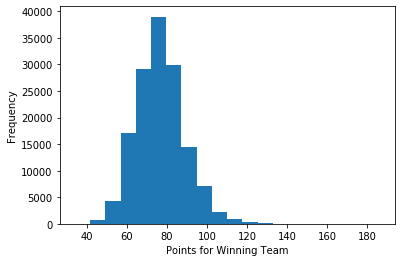

In [65]:
ax = df['Wscore'].plot.hist(bins=20)
ax.set_xlabel('Points for Winning Team')

# Other Useful Functions

* **drop()** - This function removes the column or row that you pass in (You also have the specify the axis). 
* **agg()** - The aggregate function lets you compute summary statistics about each group
* **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
* **get_dummies()** - Helpful for turning categorical data into one hot vectors.
* **drop_duplicates()** - Lets you remove identical rows

# Lots of Other Great Resources

Pandas has been around for a while and there are a lot of other good resources if you're still interested on getting the most out of this library. 
* http://pandas.pydata.org/pandas-docs/stable/10min.html
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
* https://www.dataquest.io/blog/pandas-python-tutorial/
* https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
* https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y